In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import make_poisson_pmf, update_poisson, make_mixture

In [3]:
lam = 1.4
dist = ss.poisson(lam)
k = 4
dist.pmf(k), 1 - dist.cdf(k-1)

(0.039471954028253146, 0.053725250368075406)

<AxesSubplot:>

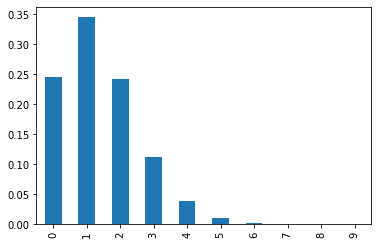

In [4]:
lam = 1.4
goals = np.arange(10)
pmf_goals = make_poisson_pmf(lam, goals)
pmf_goals.plot.bar()

<AxesSubplot:>

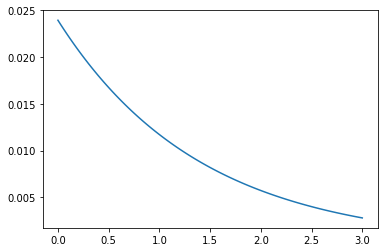

In [33]:
# 감마분포는 alpha번째 사건이 발생할 때까지 대기시간의 분포
alpha, beta = 1, 1/lam
qs = np.linspace(0, 3, 101)
ps = ss.gamma(alpha, scale=1/beta).pdf(qs)
prior = Pmf(ps, qs)
prior.normalize()
prior.plot()

<AxesSubplot:>

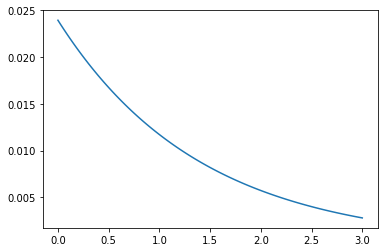

In [31]:
# 감마분포에서 shape parameter alpha가 1일 경우 지수분포와 동일
alpha, beta = 1, 1/lam
qs = np.linspace(0, 3, 101)
ps = ss.expon(scale=1/beta).pdf(qs)
prior = Pmf(ps, qs)
prior.normalize()
prior.plot()

<AxesSubplot:>

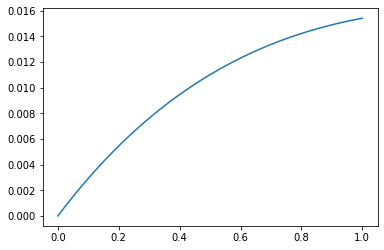

In [37]:
# 감마분포는 alpha번째 사건이 발생할 때까지 대기시간의 분포
# ex. lam(평균득점)가 1.4일 경우 두번째 골이 들어갈때까지의 대기시간은 1경기 통으로 보내는 것도 부족
alpha, beta = 2, 1/lam
qs = np.linspace(0, 1, 101)
ps = ss.gamma(alpha, scale=1/beta).pdf(qs)
prior = Pmf(ps, qs)
prior.normalize()
prior.plot()